# Limites de cantidad de resultados:
## https://dev.twitter.com/rest/public/rate-limits


<table> <tr> <th>Title</th>	<th>Resource family</th>	<th>Requests / 15-min window (user auth)</th>	<th>Requests / 15-min window (app auth)</th></tr>
<tr> <td>GET search/tweets</td>	<td>search</td>	<td>180</td>	<td>450</td> </tr>
<td>GET followers/list</td>	<td>followers</td>	<td>15</td>	<td>30</td>
</table>

## Autenticación de App

In [8]:
# coding: utf-8

import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

consumer_key ="y3WltE6AVqoddA12UmHH7tOok"
consumer_secret = "nSxWmBK8xz4t7V1RPwm5f5SkpxKc5BMGfPFpapZiROC1g4XlzT"

auth = tweepy.OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret)


#access_token = "3377301250-Zx5DAecX46aHwxJZjAhrY0Z53mONFvuPNxjfMK1"
#access_token_secret = "NfysjZ0BeKp05cipNMTayTRzKHo98Z09cM3MJPrSDwsBe"
#auth.set_access_token(access_token, access_token_secret)

# Creation of the actual interface, using authentication
api = tweepy.API(auth)

print "Autenticado"
#print api.rate_limit_status()

Autenticado


# Busco tweets con localización en Bs As

In [13]:

i= 0
results = []
#maxid = results2[-1][-1].id - 1

#,max_id=maxId,since_id=sinceId

#all_tweets = []

maxId = 1000000000000000000000000000
sinceId = -1
for tweet in tweepy.Cursor(api.search, count=100,lang="es",geocode="-34.5916734896,-58.3918617027,3mi").items():
    #print(tweet.id)
    i += 1
    if i % 100 == 0:
        print i
    all_tweets.append(tweet)
        
    #maxId = results[-1][-1].id - 1  
    #for t in results[i]:
    #    all_tweets.append(t)
    #    if t.id > sinceId:
    #        sinceId = t.id
    #        print sinceId
print len(results)

print len(all_tweets)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

TweepError: Twitter error response: status code = 429

In [14]:
print len(all_tweets)
print all_tweets[0].id

44873
799337997971787776


## Me fijo si hay repetidos

In [15]:
  
ids = [tweet.id for tweet in all_tweets]
    
#print ids.sort()
print len(ids)

import collections
repetidos =  [item for item, count in collections.Counter(ids).items() if count > 1]
print "Hay " + str(len(repetidos)) + " repetidos"

44873
Hay 1193 repetidos


## Veo cantidad de tweets con localización

In [20]:
places_dict = {}
coord = []
places2 = []
no_place = []
tot = 0.0

for tweet in all_tweets:
    tot +=1
    if tweet.place != None:
        coord.append(tweet.coordinates)
        #print tweet.place.full_name
        places2.append(tweet.place.name)
        places_dict[tweet.place.name] = 1 if not places_dict.has_key(tweet.place.name) else places_dict[tweet.place.name] + 1
    else:
        no_place.append(tweet)
            
print "Hay " + str(int(tot)) + " tweets en total"

print "\nLa cantidad de tweets con coordenadas es: " + str(len(coord))

print "\nLa cantidad de tweets sin campo place: " + str(len(no_place))

#print len(places2)/tot

a = len(places2) /15.0
print str(a) + " tweets localizados por minuto"

cant = 200
print "Haciendo " + str(cant) + " bots tendriamos " + str(int(a*cant)) + " por minuto"

#for w in sorted(places_dict, key=places_dict.get, reverse=True):
#  print w, places_dict[w]


Hay 44873 tweets en total

La cantidad de tweets con coordenadas es: 1972

La cantidad de tweets sin campo place: 42901
131.466666667 tweets localizados por minuto
Haciendo 200 bots tendriamos 26293 por minuto


## Hago Histograma de lugares con localización

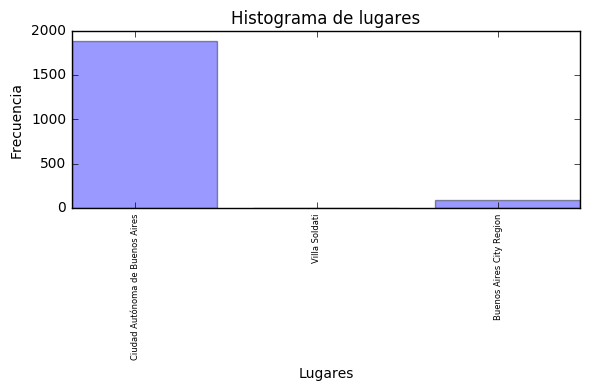

# locations = 42901


In [21]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(places_dict.keys()))
bar_width = 0.35

opacity = 0.4
plt.xticks(index + bar_width, places_dict.keys(), size=6, rotation="vertical")
plt.bar(range(len(places_dict.values())),places_dict.values(),alpha=opacity,
                 color='b',)
plt.tight_layout()
plt.show()






## Hago Lista de lugares sin localización (búsqueda por perfil)

In [23]:
locations_dict = {}
locations = []
for tweet in no_place:
    if tweet.user.location != None:
        locations.append(tweet.user.location)
        location = tweet.user.location
    if not locations_dict.has_key(location):
            locations_dict[location] = 1  
    else:
        locations_dict[location]  +=  1

print "# locations = " + str(len(locations))
#print locations_dict

canti = 20
for w in sorted(locations_dict, key=locations_dict.get, reverse=True)[:canti]:
    print w, locations_dict[w]



# locations = 42901
Buenos Aires, Argentina 13256
 8385
Buenos Aires 3321
Argentina 1330
buenos aires 421
Ciudad Autónoma de Buenos Aire 402
Buenos Aires - Argentina 384
Buenos Aires, Argentina. 331
Buenos Aires  278
Córdoba, Argentina 275
Buenos Aires, Argentina  227
Buenos Aires Argentina 169
Rosario, Argentina 151
argentina 137
Argentina, Buenos Aires 135
Buenos Aires. 113
Buenos Aires-Argentina 113
Mendoza, Argentina 104
Montevideo, Uruguay 99
Buenos aires 97


## Hago histograma de lugares sin localización (búsqueda por perfil)

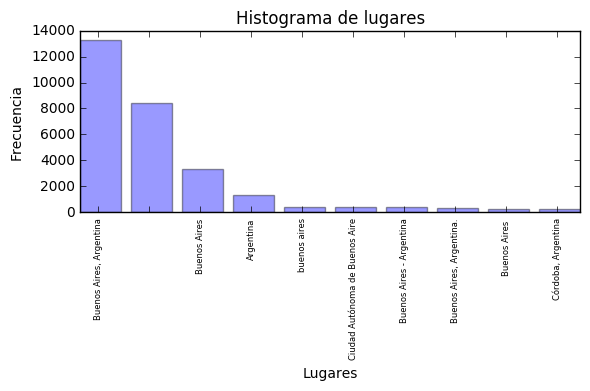

In [37]:
plt.title("Histograma de lugares")
plt.xlabel("Lugares")
plt.ylabel("Frecuencia")

index = np.arange(len(locations_dict.keys()))
bar_width = 0.35


cant = 10
valores = sorted(locations_dict.values(),reverse=True)
claves = sorted(locations_dict, key=locations_dict.get,reverse=True)




opacity = 0.4
plt.xticks(index + bar_width, claves[:cant], size=6, rotation="vertical")
plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
plt.tight_layout()
plt.show()

